# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
trainData = pd.read_csv("data/train.csv")
testData = pd.read_csv("data/test.csv")

In [3]:
trainData.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Exploratory Data Analysis

In [4]:
# Check for missing values
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>From the info, there are two features with missing values: 'Age' and 'Cabin'.<p>
</div>

#### **Thinking**
Should I remove the two features or just remove **Cabin** and delete the records with missing values in **Age**?
<hr>

# The Target: Survival

Text(0, 0.5, 'Passenger Count')

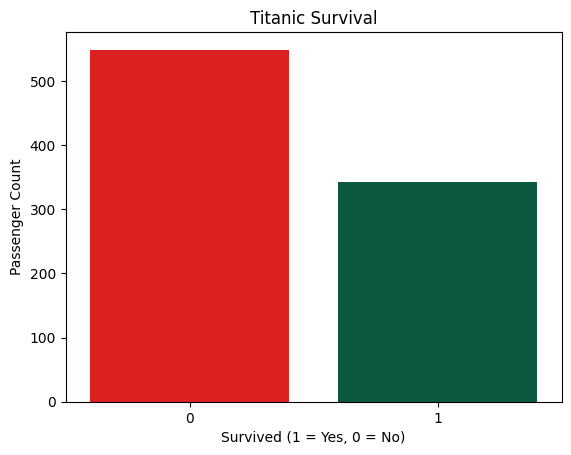

In [5]:
# How many passengers survived?
sns.countplot(x="Survived", palette=["#fc0000", "#006444"], data=trainData)
plt.title("Titanic Survival")
plt.xlabel("Survived (1 = Yes, 0 = No)")  
plt.ylabel("Passenger Count")


## 1. Survival and gender (T)

Text(0.5, 1.0, 'Survival in gender')

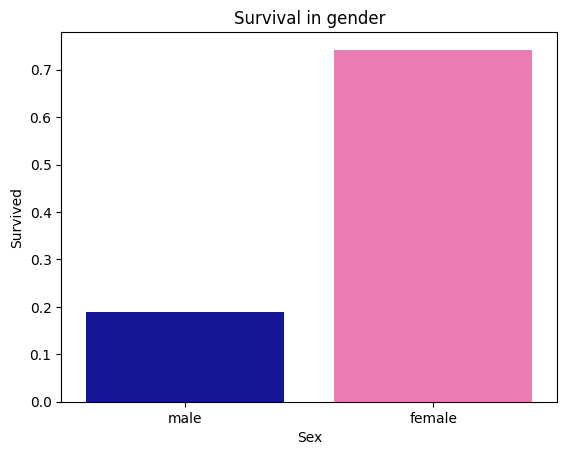

In [6]:
sns.barplot(data=trainData, x='Sex', y='Survived', palette=["#00a","#ff68b4"], errorbar=None)
plt.title('Survival in gender')


<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px; border-radius: 4px;">
<p>From the data, it's clear that 74% of women survived while only 19% of men have survived.<p>
</div>

## 2. Survival and Pclass (T)

Text(0, 0.5, 'Survival Rate')

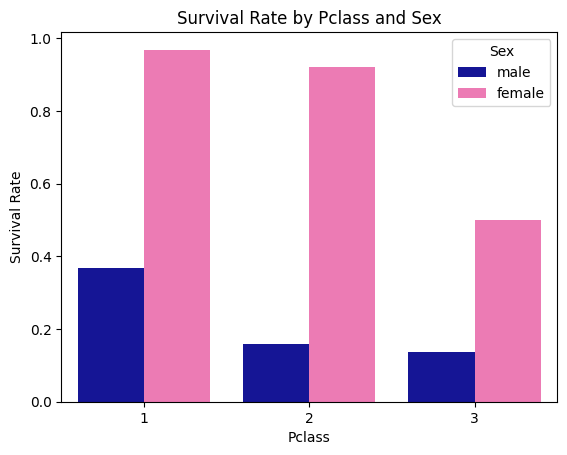

In [7]:
# Survival and class with gender

sns.barplot(x="Pclass", y="Survived", hue="Sex", palette=["#00a", "#ff68b4"], data=trainData, errorbar=None)

# Customize chart
plt.title("Survival Rate by Pclass and Sex")
plt.ylabel("Survival Rate")

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>The men have a higher chance of surviving if they bought the class 1 while women will still be safe in class 1, 2 and may have a danger in class 3<p>
</div>

## 4. Survival and Age

<Axes: xlabel='Sex', ylabel='Age'>

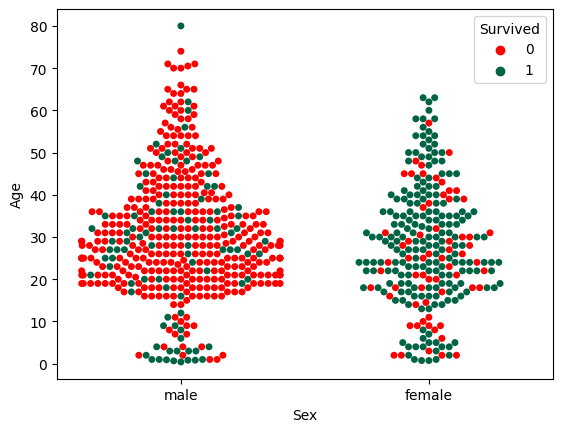

In [8]:
# servival and Age with gender
sns.swarmplot(x='Sex', y="Age", hue="Survived", palette=["#fc0000", "#006444"], data=trainData)

<Axes: xlabel='Pclass', ylabel='Age'>

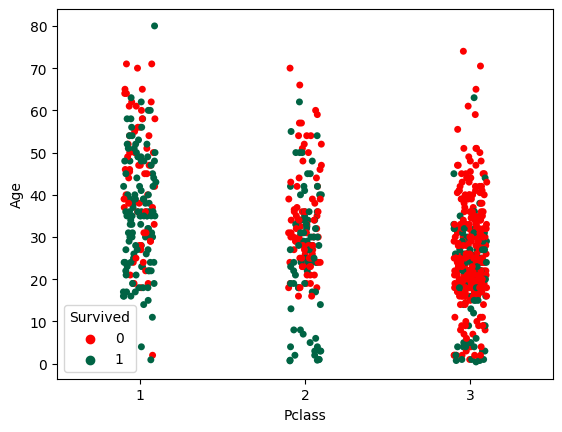

In [9]:
# survival and Age with Class
sns.stripplot(x='Pclass', y="Age", hue="Survived", palette=["#fc0000", "#006444"], data=trainData)

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>As the captian said "Women and Childern", here we have the childern with age nearby 10 years old have a better servival rate in class 1, 2 while still struggling in class 3.<p>
<p style="color: #fc0000;"> I should remember that there are missing values in the Age</p>
</div>

## Survival and Fare

<Axes: xlabel='Sex', ylabel='Fare'>

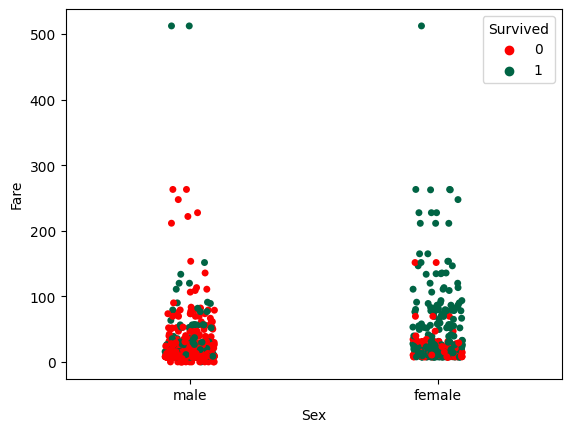

In [10]:
# Fare with gender
sns.stripplot(data=trainData, x='Sex', y='Fare',hue="Survived", palette=["#fc0000", "#006444"])

<Axes: xlabel='Pclass', ylabel='Fare'>

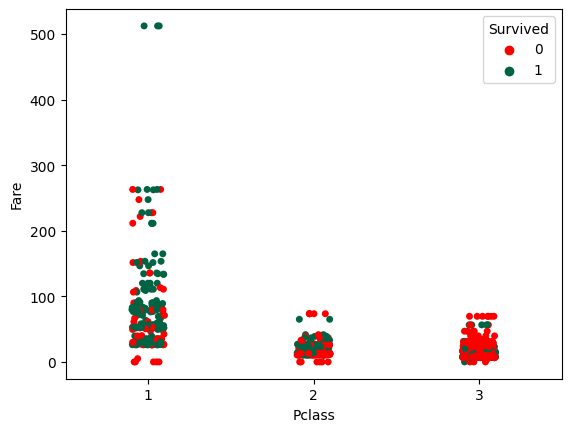

In [11]:
# Fare with class
sns.stripplot(data=trainData, x='Pclass', y='Fare',hue="Survived", palette=["#fc0000", "#006444"])

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>All men who paid more than 500 and women who paid more than 200 have survived<p>
</div>

## Survival and Embarkeation

<Axes: xlabel='Embarked', ylabel='Survived'>

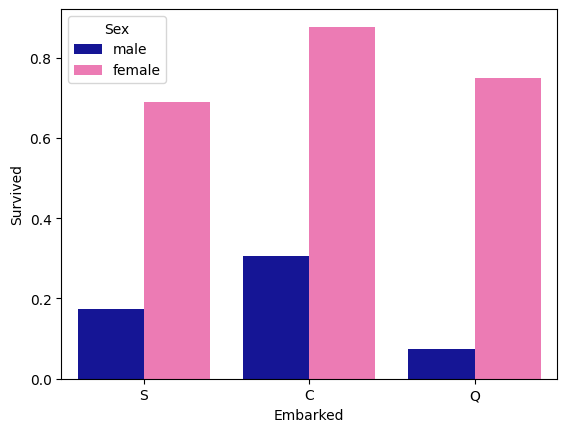

In [12]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", palette=["#00a", "#ff68b4"], data=trainData, errorbar=None)

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>I can see that Cherbourg has a good rate, <span style="color: #fc0000;">but I still don't know why the place of embarkation influence the survival rate at all?</span><p>
</div>


## Survival and family

<Axes: xlabel='Parch', ylabel='count'>

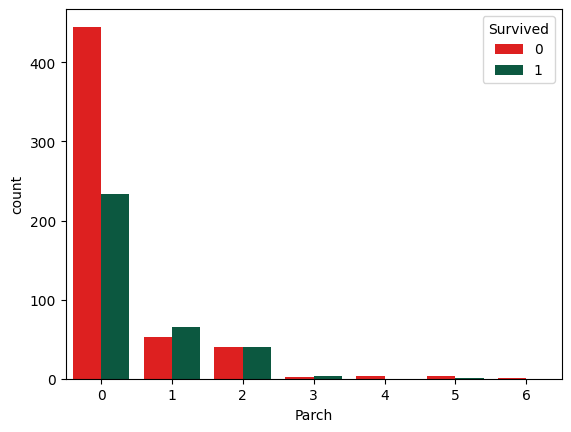

In [13]:
# Parents and survival
sns.countplot(x="Parch", hue="Survived", palette=["#fc0000", "#006444"], data=trainData)

<Axes: xlabel='SibSp', ylabel='count'>

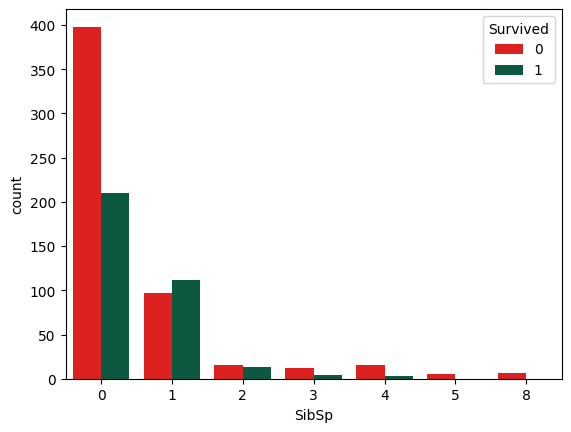

In [14]:
# Siblings and survival
sns.countplot(x="SibSp", hue="Survived", palette=["#fc0000", "#006444"], data=trainData)

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>It seems like solo people and small families have a better chance of surviving<p>
</div>